In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('webserverlog.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ClientIP     1150 non-null   object
 1   Status_code  1150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.1+ KB


In [4]:
dataset.head()

,ClientIP,Status_code
0,192.168.29.137,200
1,192.168.29.137,200
2,192.168.29.137,200
3,192.168.29.137,200
4,192.168.29.137,200


In [5]:
dataset.ClientIP.value_counts()

192.168.43.108    270
192.168.43.100    230
192.168.29.101    200
192.168.43.101    130
192.168.29.137    101
192.168.43.137    100
192.168.43.85      51
192.168.43.92      50
192.168.43.1       18
Name: ClientIP, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
x = dataset.iloc[:,:]

In [8]:
X = x.values

In [9]:
label = LabelEncoder()

In [10]:
ips = label.fit_transform(X[:,0])

In [11]:
s_code = label.fit_transform(X[:,1])

In [12]:
col1 = pd.DataFrame(ips, columns=["ClientIP_label"])

In [13]:
col2 = pd.DataFrame(s_code, columns=["Status_code_label"])

In [14]:
labeled_data = pd.concat([col1,col2],axis=1)

In [15]:
labeled_data.head()

,ClientIP_label,Status_code_label
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
scaled_data = sc.fit_transform(labeled_data)

In [19]:
scaled_data

array([[-1.09816715, -0.11215443],
       [-1.09816715, -0.11215443],
       [-1.09816715, -0.11215443],
       ...,
       [ 0.64135382, -0.11215443],
       [ 0.64135382, -0.11215443],
       [ 0.64135382, -0.11215443]])

In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters=4)

In [22]:
pred = model.fit_predict(scaled_data)

In [23]:
pred

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [24]:
scaled_data = pd.DataFrame(scaled_data, columns=["Scaled_ClientIP","Scaled_Status_code"])

In [25]:
scaled_data.head()

,Scaled_ClientIP,Scaled_Status_code
0,-1.098167,-0.112154
1,-1.098167,-0.112154
2,-1.098167,-0.112154
3,-1.098167,-0.112154
4,-1.098167,-0.112154


In [26]:
scaled_data['Cluster'] = pred

In [27]:
scaled_data.head()

,Scaled_ClientIP,Scaled_Status_code,Cluster
0,-1.098167,-0.112154,3
1,-1.098167,-0.112154,3
2,-1.098167,-0.112154,3
3,-1.098167,-0.112154,3
4,-1.098167,-0.112154,3


In [28]:
import matplotlib.pyplot as plt

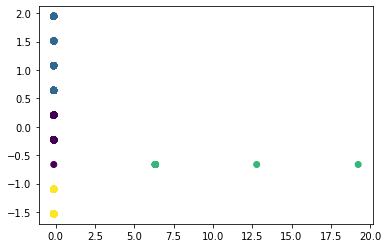

In [29]:
plt.scatter(scaled_data['Scaled_Status_code'], scaled_data['Scaled_ClientIP'], c=scaled_data['Cluster'])

In [30]:
ips = pd.concat([dataset['ClientIP'],labeled_data['ClientIP_label']],axis=1)

In [31]:
ips.head()

,ClientIP,ClientIP_label
0,192.168.29.137,1
1,192.168.29.137,1
2,192.168.29.137,1
3,192.168.29.137,1
4,192.168.29.137,1


In [32]:
ipFrequency = ips['ClientIP_label'].value_counts()

In [33]:
res = []
for i in range(9):
    if ipFrequency[i] > 200:
        res.append(ips['ClientIP'].iloc[ips['ClientIP_label'].tolist().index(i)])

In [34]:
res

['192.168.43.100', '192.168.43.108']

In [35]:
with open('result.txt','w') as file:
    file.writelines("%s\n" % l for l in res)
    file.close()